# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

#url = url + "q=" + city + "&appid=" + weather_api_key
#response = print(requests.get(url))


In [8]:
#city1 = 'New York'
#city_url = url + "q=" + city1 + "&appid=" + weather_api_key

#print(requests.get(city_url).json())

In [9]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | tofol
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | akureyri
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | burlington
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | jesus maria
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | horovice
Processing Record 21 of Set 1 | papatowai

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()


City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,276.73,81,100,5.86,TF,1723516537
1,tofol,5.3248,163.0078,301.79,72,29,4.54,FM,1723516538
2,puerto ayora,-0.7393,-90.3518,293.46,94,86,3.58,EC,1723516274
3,edinburgh of the seven seas,-37.0676,-12.3116,284.82,67,33,4.13,SH,1723516542
4,akureyri,65.6835,-18.0878,283.11,87,100,8.23,IS,1723516543


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,276.73,81,100,5.86,TF,1723516537
1,tofol,5.3248,163.0078,301.79,72,29,4.54,FM,1723516538
2,puerto ayora,-0.7393,-90.3518,293.46,94,86,3.58,EC,1723516274
3,edinburgh of the seven seas,-37.0676,-12.3116,284.82,67,33,4.13,SH,1723516542
4,akureyri,65.6835,-18.0878,283.11,87,100,8.23,IS,1723516543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

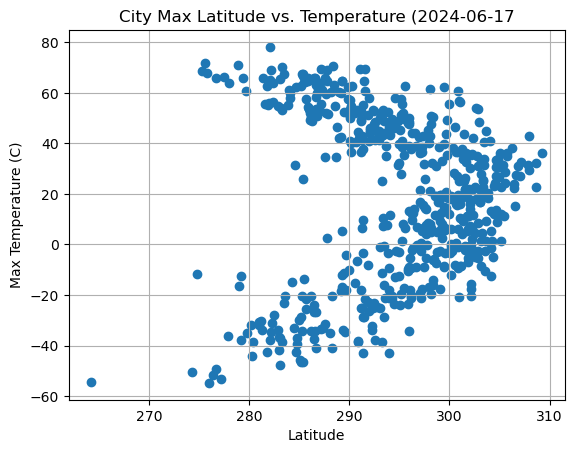

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

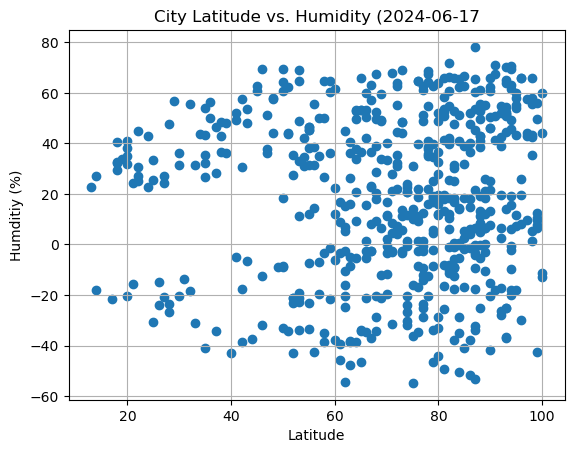

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17')
plt.ylabel('Humditiy (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

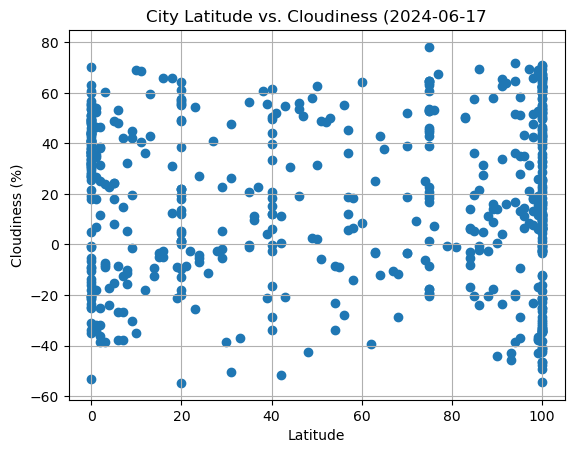

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

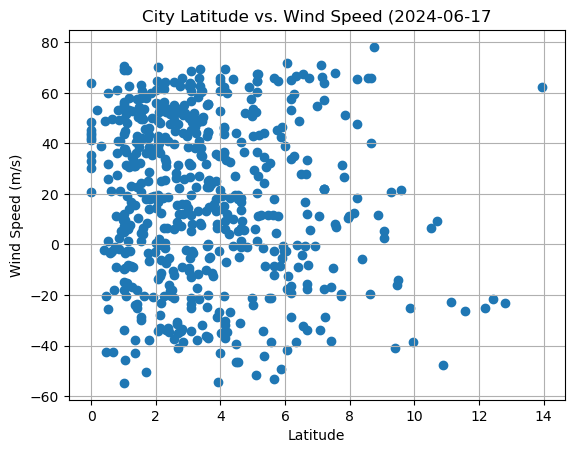

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linear_regression(xaxis, yaxis, line_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
    regress = xaxis * slope + intercept 
    line_equation = 'y = '+ str(round(slope,2)) +  "x + " + str(round(intercept,2))
    plt.plot(xaxis, regress,'r-')
    plt.annotate(line_equation,(line_coord), fontsize =15, color = 'red')
    plt.scatter(xaxis,yaxis)
    print(f'The r-value is: {rvalue**2}')


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tofol,5.3248,163.0078,301.79,72,29,4.54,FM,1723516538
4,akureyri,65.6835,-18.0878,283.11,87,100,8.23,IS,1723516543
5,hadibu,12.6500,54.0333,299.21,77,18,8.14,YE,1723516544
7,katsuura,35.1333,140.3000,302.73,78,96,3.94,JP,1723516547
8,kodiak,57.7900,-152.4072,289.88,42,20,6.17,US,1723516548


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,276.73,81,100,5.86,TF,1723516537
2,puerto ayora,-0.7393,-90.3518,293.46,94,86,3.58,EC,1723516274
3,edinburgh of the seven seas,-37.0676,-12.3116,284.82,67,33,4.13,SH,1723516542
6,grytviken,-54.2811,-36.5092,264.23,62,100,3.92,GS,1723516545
10,waitangi,-43.9535,-176.5597,280.27,80,90,5.36,NZ,1723516550


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.46698476303973696


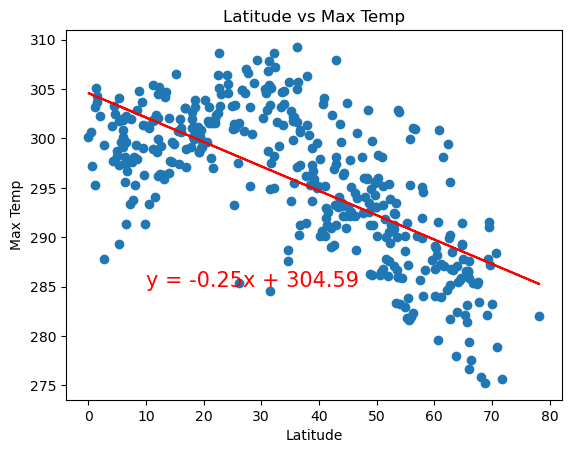

In [46]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10,285))
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')

plt.show()


The r-value is: 0.5598566559081088


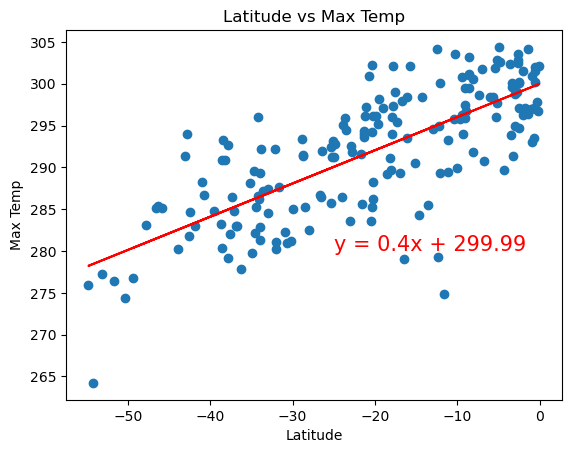

In [42]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25,280))
plt.title('Latitude vs Max Temp')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** 
We can see that the northern hemisphere with an r value of 0.4399149179460481 has a lower modteraly positive correlation to th max temperature comapred to the souther hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0019647333263523707


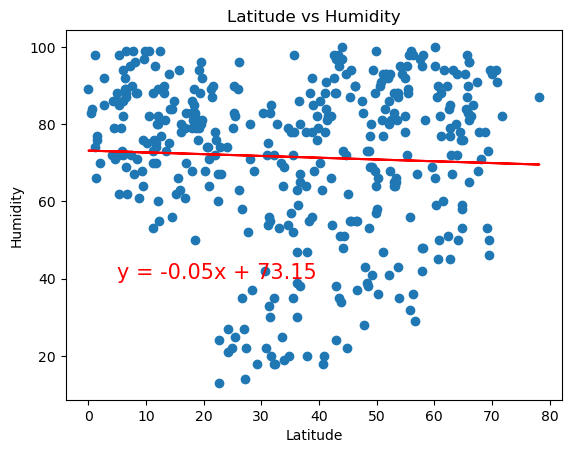

In [45]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], (5, 40))
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.012711876744639626


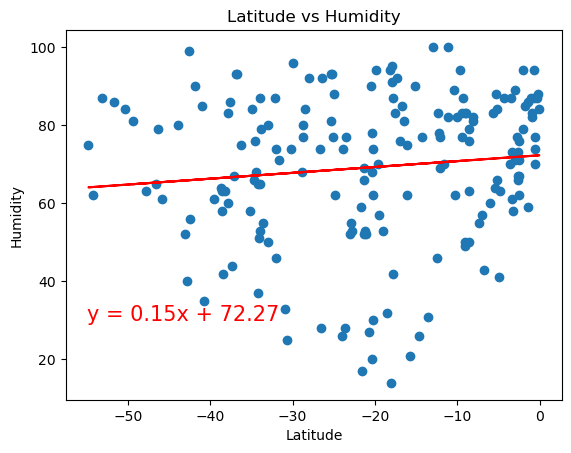

In [47]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55,30))
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002030478353309721  y = -0.08x + 60.56


NameError: name 'line_eq' is not defined

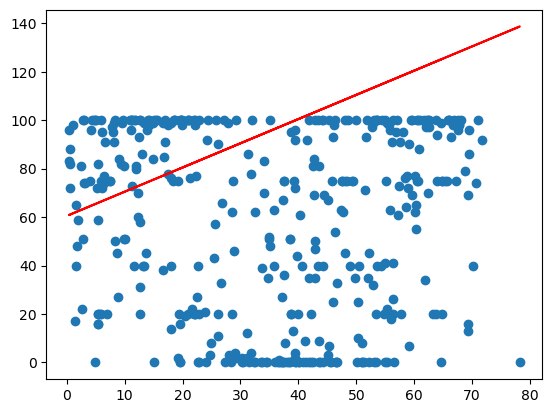

In [63]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], )
plt.annotate(line_eq,(15, 120) , color = 'red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.0034743607357397995  y = -0.16x + 46.44


NameError: name 'line_eq' is not defined

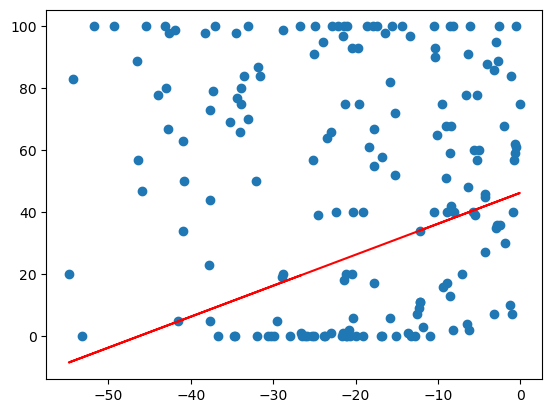

In [64]:
# Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Cloudiness'])
plt.annotate(line_eq,(-55, 30) , color = 'red')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.330102425304167e-05  y = 0.0x + 3.45


NameError: name 'line_eq' is not defined

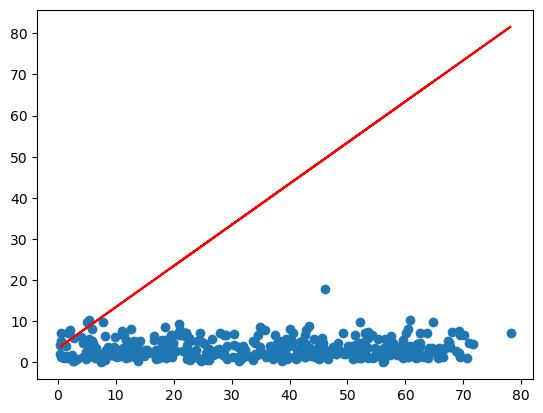

In [65]:
# Northern Hemisphere
linear_regression(xaxis = northern_hemi_df['Lat'], yaxis = northern_hemi_df['Wind Speed'])
plt.annotate(line_eq,(40, 30) , color = 'red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

The r-value is: 0.03774779657990049  y = -0.04x + 2.82


NameError: name 'line_eq' is not defined

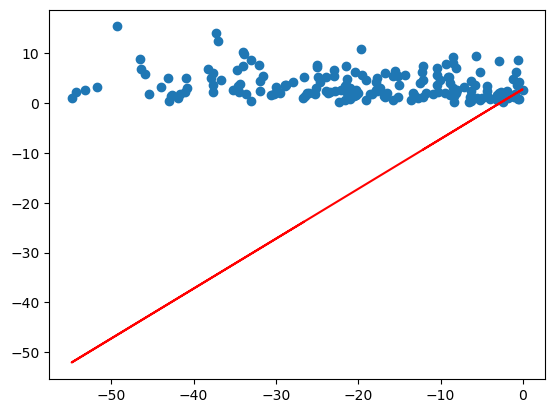

In [66]:
# Southern Hemisphere
linear_regression(xaxis = southern_hemi_df['Lat'], yaxis = southern_hemi_df['Wind Speed'])
plt.annotate(line_eq,(-30, -45) , color = 'red')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE